
Menu:
1. Load and Detect Objects in Image
2. Exit
Enter your choice (1/2): 1
Enter the path to the image file: f2.jfif

0: 416x640 5 persons, 2 horses, 1 cow, 237.1ms
Speed: 7.0ms preprocess, 237.1ms inference, 4.0ms postprocess per image at shape (1, 3, 416, 640)


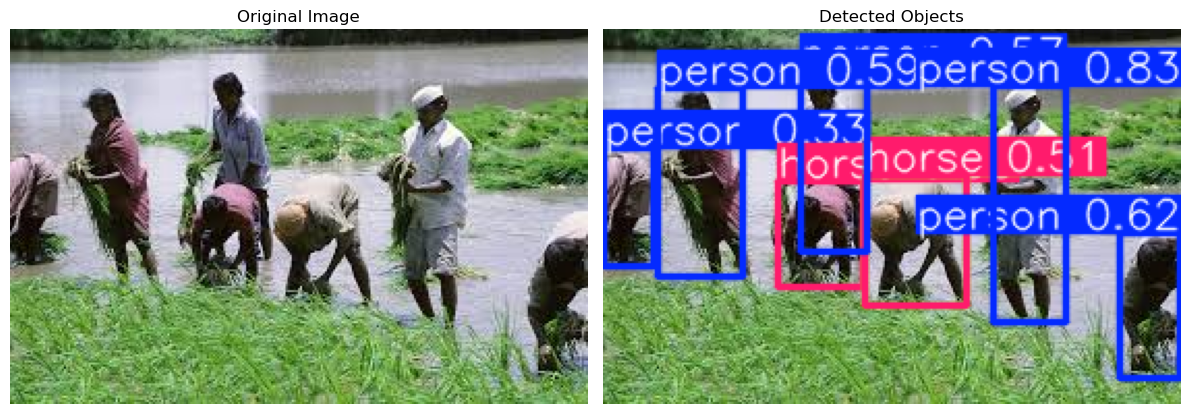


Menu:
1. Load and Detect Objects in Image
2. Exit
Enter your choice (1/2): 1
Enter the path to the image file: f1.jpg

0: 352x640 6 persons, 172.4ms
Speed: 2.6ms preprocess, 172.4ms inference, 4.0ms postprocess per image at shape (1, 3, 352, 640)


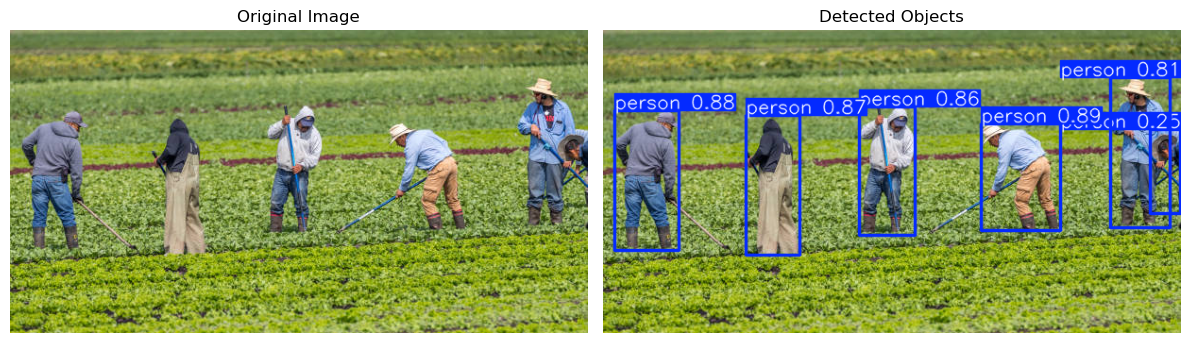


Menu:
1. Load and Detect Objects in Image
2. Exit


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

def display_images(original_img_rgb, annotated_img_rgb):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(original_img_rgb)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(annotated_img_rgb)
    axes[1].set_title('Detected Objects')
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

def main():
    model = YOLO('/content/yolov8n.pt')
    
    while True:
        print("\nMenu:")
        print("1. Load and Detect Objects in Image")
        print("2. Exit")
        choice = input("Enter your choice (1/2): ")
        
        if choice == '1':
            img_path = input("Enter the path to the image file: ")
            original_img = cv2.imread(img_path)
            
            if original_img is None:
                print("Error: Image not found or unable to load.")
                continue
            
            original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
            results = model(original_img)
            result = results[0] if isinstance(results, list) else results
            annotated_img = result.plot()
            annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
            
            display_images(original_img_rgb, annotated_img_rgb)
        
        elif choice == '2':
            print("Exiting...")
            break
        
        else:
            print("Invalid choice. Please enter 1 or 2.")

if __name__ == "__main__":
    main()
